**FlipKart Reviews Sentiment Analysis using Python**

Load the dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving flipkart_data.csv to flipkart_data.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('flipkart_data.csv')
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [8]:
#import essential libraries

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Data handling
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ML and text processing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



**Data Pre-processing**

Data Cleaning

In [9]:
# Define stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Text cleaning function
def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and special characters
    words = text.split()  # Tokenize
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

# Check if 'cleaned_review' exists; if not, create it
if 'cleaned_review' not in df.columns:
    df['cleaned_review'] = df['review'].apply(clean_text)


In [10]:
print(df[['review', 'cleaned_review']].head())

                                              review  \
0  It was nice produt. I like it's design a lot. ...   
1  awesome sound....very pretty to see this nd th...   
2  awesome sound quality. pros 7-8 hrs of battery...   
3  I think it is such a good product not only as ...   
4  awesome bass sound quality very good bettary l...   

                                      cleaned_review  
0  nice produt like design lot easi carri look st...  
1  awesom soundveri pretti see nd sound qualiti g...  
2  awesom sound qualiti pro hr batteri life inclu...  
3  think good product per qualiti also design qui...  
4  awesom bass sound qualiti good bettari long li...  


Handle missing values, duplicates, and label encoding.

In [11]:
# Drop missing and duplicate values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Create sentiment column from rating
def get_sentiment(rating):
    return 'positive' if rating >= 4 else 'negative'

df['sentiment'] = df['rating'].apply(get_sentiment)

# Encode sentiment to numeric label
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Check result
print(df[['rating', 'sentiment', 'label']].head())


   rating sentiment  label
0       5  positive      1
1       5  positive      1
2       4  positive      1
3       5  positive      1
4       5  positive      1


Text Vectorization & Data Splitting

In [12]:
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned reviews
X = tfidf.fit_transform(df['cleaned_review']).toarray()

# Define target labels
y = df['label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to confirm
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (6294, 5000)
Test set shape: (1574, 5000)


**Exploratory Data Analysis (EDA)**

Sentiment Distribution Plot

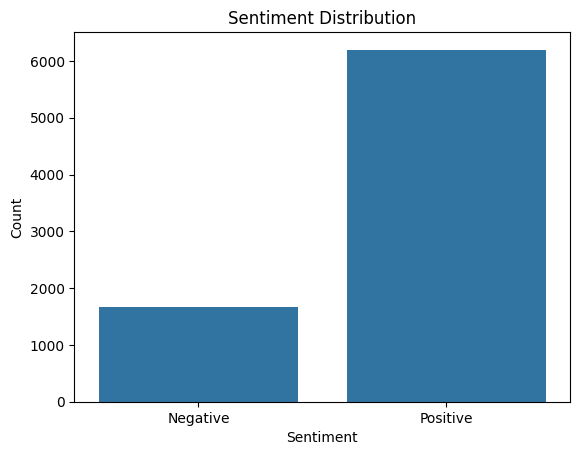

In [13]:
sns.countplot(x='label', data=df)
plt.title("Sentiment Distribution")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


Word Clouds for Positive & Negative Reviews

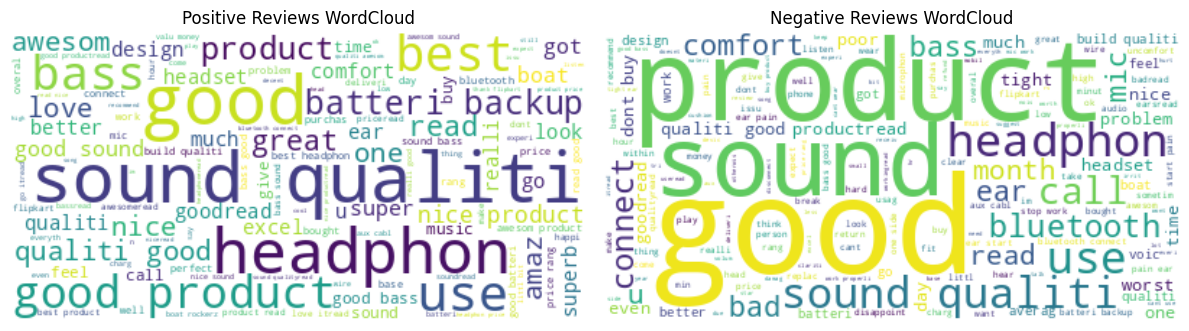

In [14]:
# Combine all cleaned reviews by label
positive_text = " ".join(df[df['label'] == 1]['cleaned_review'])
negative_text = " ".join(df[df['label'] == 0]['cleaned_review'])

# Plot WordClouds
plt.figure(figsize=(12,5))

# Positive reviews wordcloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Positive Reviews WordCloud")
plt.axis('off')

# Negative reviews wordcloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(background_color='white').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative Reviews WordCloud")
plt.axis('off')

plt.tight_layout()
plt.show()


 Review Length vs Sentiment

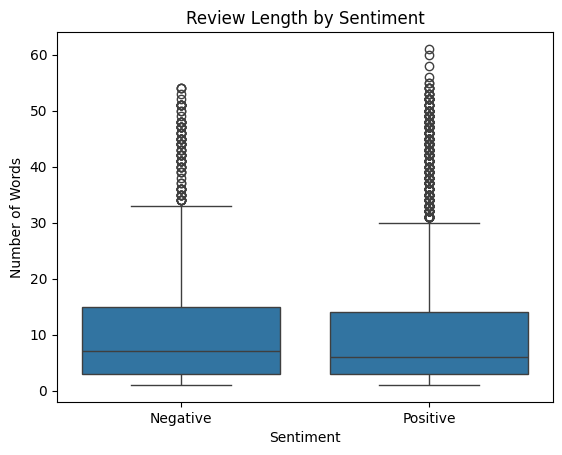

In [15]:
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))

sns.boxplot(x='label', y='review_length', data=df)
plt.title("Review Length by Sentiment")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel("Sentiment")
plt.ylabel("Number of Words")
plt.show()


**Model Training & Comparison**

Logistic Regression

In [16]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("===== Logistic Regression =====")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score Report:\n", classification_report(y_test, y_pred_lr, target_names=["Negative", "Positive"]))


===== Logistic Regression =====
Accuracy: 0.8684879288437103
F1 Score Report:
               precision    recall  f1-score   support

    Negative       0.82      0.45      0.59       321
    Positive       0.87      0.97      0.92      1253

    accuracy                           0.87      1574
   macro avg       0.85      0.71      0.75      1574
weighted avg       0.86      0.87      0.85      1574



Naive Bayes

In [17]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluation
print("===== Naive Bayes =====")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1 Score Report:\n", classification_report(y_test, y_pred_nb, target_names=["Negative", "Positive"]))


===== Naive Bayes =====
Accuracy: 0.8271918678526048
F1 Score Report:
               precision    recall  f1-score   support

    Negative       0.92      0.17      0.28       321
    Positive       0.82      1.00      0.90      1253

    accuracy                           0.83      1574
   macro avg       0.87      0.58      0.59      1574
weighted avg       0.84      0.83      0.78      1574



Random Forest

In [18]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("===== Random Forest Classifier =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score Report:\n", classification_report(y_test, y_pred_rf, target_names=["Negative", "Positive"]))


===== Random Forest Classifier =====
Accuracy: 0.8627700127064803
F1 Score Report:
               precision    recall  f1-score   support

    Negative       0.79      0.45      0.57       321
    Positive       0.87      0.97      0.92      1253

    accuracy                           0.86      1574
   macro avg       0.83      0.71      0.74      1574
weighted avg       0.86      0.86      0.85      1574



Support Vector Machine (SVM)

In [19]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("===== Support Vector Machine =====")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score Report:\n", classification_report(y_test, y_pred_svm, target_names=["Negative", "Positive"]))


===== Support Vector Machine =====
Accuracy: 0.8710292249047014
F1 Score Report:
               precision    recall  f1-score   support

    Negative       0.84      0.45      0.59       321
    Positive       0.88      0.98      0.92      1253

    accuracy                           0.87      1574
   macro avg       0.86      0.72      0.76      1574
weighted avg       0.87      0.87      0.86      1574



**Final Evaluation & New Predictions**

Final Evaluation with Metrics

In [21]:
# Use SVM model as final
final_model = svm_model

# Predict and evaluate
final_preds = final_model.predict(X_test)

print("===== Final Model: SVM =====")
print("Accuracy:", accuracy_score(y_test, final_preds))
print("Classification Report:\n", classification_report(y_test, final_preds, target_names=["Negative", "Positive"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_preds))


===== Final Model: SVM =====
Accuracy: 0.8710292249047014
Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.45      0.59       321
    Positive       0.88      0.98      0.92      1253

    accuracy                           0.87      1574
   macro avg       0.86      0.72      0.76      1574
weighted avg       0.87      0.87      0.86      1574

Confusion Matrix:
 [[ 146  175]
 [  28 1225]]


Test the Model on New Reviews

In [22]:
# Example new reviews
sample_reviews = [
    "Excellent phone, battery life is amazing!",
    "Poor quality, broke within a week.",
    "Just okay, not worth the price.",
    "Super fast delivery and great product!",
    "Terrible packaging and damaged item."
]

# Clean and transform
sample_cleaned = [clean_text(review) for review in sample_reviews]
sample_vectorized = tfidf.transform(sample_cleaned).toarray()
sample_predictions = final_model.predict(sample_vectorized)

# Display predictions
for review, pred in zip(sample_reviews, sample_predictions):
    print(f"Review: \"{review}\" → Sentiment: {'Positive' if pred == 1 else 'Negative'}")


Review: "Excellent phone, battery life is amazing!" → Sentiment: Positive
Review: "Poor quality, broke within a week." → Sentiment: Negative
Review: "Just okay, not worth the price." → Sentiment: Positive
Review: "Super fast delivery and great product!" → Sentiment: Positive
Review: "Terrible packaging and damaged item." → Sentiment: Negative


**Using Support Vector Machine, we achieved an accuracy of 87.1%, making it the best model for Flipkart review sentiment classification. This model can now be used to automatically evaluate customer feedback and support better product decisions.**

In [23]:
import joblib

# Save the trained SVM model and TF-IDF vectorizer
joblib.dump(svm_model, "model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']